In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head(n=3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

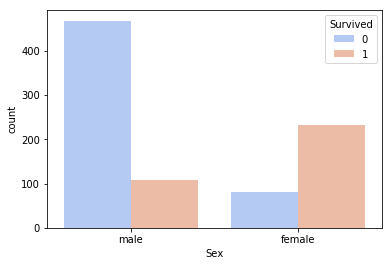

In [5]:
sns.countplot(x=df['Sex'],data=df,palette="coolwarm",hue=df['Survived'])

In [ ]:
sns.countplot(x=df['Survived'],data=df,palette="coolwarm")

In [ ]:
sns.distplot(df['Age'].dropna(),kde=False,bins=30,color="red")

In [6]:
def insert(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age
    

In [ ]:
df[['Age','Pclass']].head(n=3)

In [7]:
df['Age'] = df[['Age','Pclass']].apply(insert,axis=1)

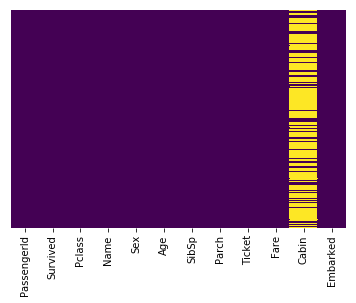

In [8]:
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [ ]:
df['Age']

In [ ]:
df['Age'].isnull()

In [9]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.isnull().any()

In [ ]:
df.info()

In [10]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
emabarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [ ]:
df.head()

In [11]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [12]:
df = pd.concat([df,sex,emabarked],axis=1)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.33, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lm = LogisticRegression()

In [18]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
predictions = lm.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.88      0.84       175
          1       0.80      0.70      0.75       120

avg / total       0.81      0.81      0.80       295



In [25]:
print(confusion_matrix(y_test,predictions))

[[154  21]
 [ 36  84]]
